In [86]:
import nltk
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.corpus import stopwords
import string
import re
import nltk
import string
import pandas as pd
import matplotlib.pyplot as plt
import numpy as nu


In [11]:
f = open("dialogs.txt", "r")
print(f.read())
# reading the data 

hi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i've actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?
which school do 

In [12]:
df=pd.read_csv('dialogs.txt',names=('Query','Response'),sep=('\t'))
print(f.read())


In [13]:
df=pd.read_csv('dialogs.txt',names=('Query','Response'),sep=('\t'))


In [14]:
df.shape

(3725, 2)

In [15]:
df.columns

Index(['Query', 'Response'], dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB


In [17]:
df.describe()

,Query,Response
count,3725,3725
unique,3510,3512
top,what do you mean?,what do you mean?
freq,22,22


In [18]:
df.nunique()

Query       3510
Response    3512
dtype: int64

In [19]:
df.isnull().sum()

Query       0
Response    0
dtype: int64

In [20]:
df['Query'].value_counts()

what do you mean?                              22
why not?                                       16
what happened?                                 10
why is that?                                    9
me too.                                         7
                                               ..
you can yell at them.                           1
and they will yell back at you.                 1
yelling doesn't do any good.                    1
will you look at this form?                     1
but i do all my writing with my right hand.     1
Name: Query, Length: 3510, dtype: int64

In [21]:
df['Response'].value_counts()

what do you mean?                                                       22
why not?                                                                16
what happened?                                                          10
why is that?                                                             9
of course.                                                               8
                                                                        ..
i don't understand some things.                                          1
let me help you.                                                         1
what does "mi" mean?                                                     1
mi stands for middle initial.                                            1
start typing instead. that way your left hand will do half the work.     1
Name: Response, Length: 3512, dtype: int64

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [23]:
Text=df['Query']

In [28]:
sid = SentimentIntensityAnalyzer()
for sentence in Text:
     print(sentence)
        
     ss = sid.polarity_scores(sentence)
     for k in ss:
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
of course i heard that. i thought a plane had crashed into your house.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it wasn't that loud.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i will blow my nose sometime for you, and you'll see.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
okay. i'll take your word for it.
neg: 0.0, neu: 0.759, pos: 0.241, compound: 0.2263, 
i thought you had an elephant in your house.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you're funny.
neg: 0.0, neu: 0.256, pos: 0.744, compound: 0.4404, 
what did you say? i think i've gone deaf.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i have lots of friends.
neg: 0.0, neu: 0.492, pos: 0.508, compound: 0.4767, 
really? how many do you have?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't know, maybe one hundred.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that is a lot of friends. do you have a best friend?
neg: 0.0, neu: 0.4, 

In [29]:
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)

In [30]:
from wordcloud import WordCloud
# importing word cloud

In [32]:
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=df.Query.values
    wc= WordCloud(background_color="black",max_words=1000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
# visualising wordcloud    

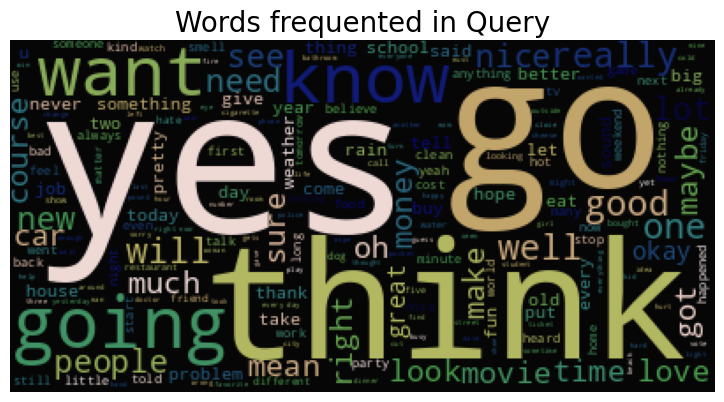

In [33]:
wordcloud(df,'Query')


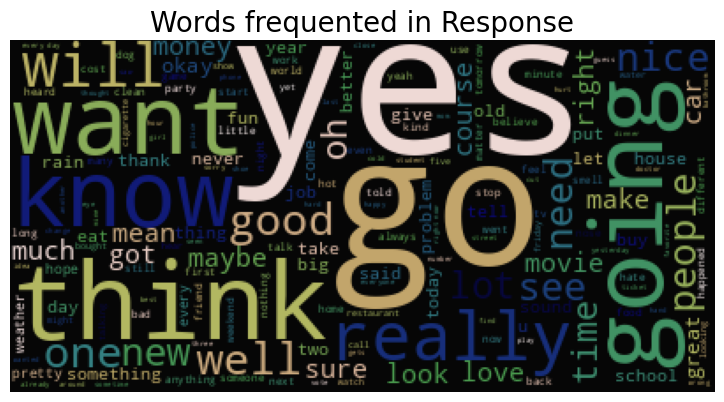

In [34]:
wordcloud(df,'Response')


In [35]:
import re


In [36]:
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())


In [37]:
remove_n = lambda x: re.sub("\n", " ", x)


In [38]:
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)


In [39]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)


In [40]:
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)


In [41]:
df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)


In [42]:
df

,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.000,1.000,0.000,0.0000
1,i m fine how about yourself,i m pretty good thanks for asking,0.000,0.690,0.310,0.2023
2,i m pretty good thanks for asking,no problem so how have you been,0.000,0.250,0.750,0.8402
3,no problem so how have you been,i ve been great what about you,0.495,0.505,0.000,-0.5994
4,i ve been great what about you,i ve been good i m in school right now,0.000,0.549,0.451,0.6249
...,...,...,...,...,...,...
3720,that s a good question maybe it s not old age,are you right handed,0.000,0.707,0.293,0.4404
3721,are you right handed,yes all my life,0.000,1.000,0.000,0.0000
3722,yes all my life,you re wearing out your right hand stop using...,0.000,0.526,0.474,0.4019
3723,you re wearing out your right hand stop using...,but i do all my writing with my right hand,0.153,0.625,0.222,0.2500


In [43]:
pd.set_option('display.max_rows',3800)


In [44]:
imp_sent=df.sort_values(by='compound', ascending=False)


In [45]:
imp_sent.head(5)


,Query,Response,neg,neu,pos,compound
1019,if we are good we will be happy in heaven wit...,that s what many people believe,0.0,0.400,0.600,0.9001
565,yeah it sounds like it s going to be the best...,exactly it seems like it s going to be loads ...,0.0,0.463,0.537,0.8910
1235,that is a lot of friends do you have a best f...,of course i have lots of best friends,0.0,0.400,0.600,0.8885
3414,well that s okay as long as it helps him rel...,yes we need a relaxed president who thinks cl...,0.0,0.419,0.581,0.8883
3470,so it s better to save money than to have an h...,well the democratic party says it was an hone...,0.0,0.482,0.518,0.8651


In [46]:
pos_sent=df.sort_values(by='pos', ascending=False)


In [48]:
pos_sent.head(5)


,Query,Response,neg,neu,pos,compound
1659,please,you know the rules,0.0,0.0,1.0,0.3182
1191,yes,no that s incomplete,0.0,0.0,1.0,0.4019
223,well congratulations,thank you,0.0,0.0,1.0,0.7184
2745,i agree,you never know what might happen on these free...,0.0,0.0,1.0,0.3612
3583,sure,thank you,0.0,0.0,1.0,0.3182


In [49]:
neg_sent=df.sort_values(by='neg', ascending=False)


In [50]:
neg_sent.head(5)


,Query,Response,neg,neu,pos,compound
1294,no,how do you know,1.000,0.000,0.0,-0.2960
2378,no,he had dirty fingernails,1.000,0.000,0.0,-0.2960
154,no problem,did you need something,1.000,0.000,0.0,-0.5994
3095,no i hate vegetables,but you eat fruits,0.855,0.145,0.0,-0.7096
13,never better thanks,so how have you been lately,0.828,0.172,0.0,-0.5875


In [51]:
neu_sent=df.sort_values(by='neu', ascending=False)


In [67]:
neu_sent.head(5)


,Query,Response,neg,neu,pos,compound
0,hi how are you doing,i m fine how about yourself,0.0,1.0,0.0,0.0
3050,we get hamburgers and steak,oh that s so delicious,0.0,1.0,0.0,0.0
1596,what is gravity,it s the force that pulls everything down,0.0,1.0,0.0,0.0
1597,it s the force that pulls everything down,i don t understand,0.0,1.0,0.0,0.0
1598,i don t understand,if you pour water into a glass the water goes...,0.0,1.0,0.0,0.0


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install nu
tfidf = TfidfVectorizer()
factors = tfidf.fit_transform(df['Query']).toarray()
tfidf.get_feature_names_out()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement nu (from versions: none)
ERROR: No matching distribution found for nu


array(['able', 'about', 'absolutely', ..., 'yy', 'zip', 'zoo'],
      dtype=object)

In [55]:
tfidf = TfidfVectorizer()


In [56]:
factors = tfidf.fit_transform(df['Query']).toarray()


In [73]:
tfidf.get_feature_names_out()


array(['able', 'about', 'absolutely', ..., 'yy', 'zip', 'zoo'],
      dtype=object)

In [100]:
from sklearn.metrics.pairwise import cosine_distances
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()




[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [88]:
query = 'who are you ?'
def chatbot(query):
    # step:-1 clean
    query = nu.lemmatization_sentence(query)
    # step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict

In [101]:
while True:
    query = input('USER: ')
    if query == 'exit':
        break
        
    response = chatbot(query)
    if response['score'] <= 0.2: # 
        print('BOT: Please rephrase your Question.')
    
    else:
        print('='*80)
        print('logs:\n Matched Question: %r\n Confidence Score: %0.2f \n PositiveScore: %r \n NegativeScore: %r\n NeutralScore: %r'%(
            response['match'],response['score']*100,response['pos'],response['neg'],response['neu']))
        print('='*80)
        print('BOT: ',response['response'])

USER: hi


TypeError: ignored

In [109]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.corpus import stopwords
import string
import re
import nltk
import string
import pandas as pd
import matplotlib.pyplot as plt
# Loading necessary libraries

f = open("dialogs.txt", "r")
print(f.read())
# reading the data 
df=pd.read_csv('dialogs.txt',names=('Query','Response'),sep=('\t'))
# Reading the data
df
# loading the data
## Data Understanding
df.shape
# There are 3724 rows and 2 columns in our dataset
df.columns
# Displaying the names of columns present in the dataset
df.info()
# Checking information of the data
df.describe()
# Describe function shows us the frequency,unique and counts of all columns
df.nunique()
# nunique() function return number of unique elements in the object. 
df.isnull().sum()
# Checking for the presence of null values in the data. As we can see there are no null values present in the data
df['Query'].value_counts()
# Checking the counts of the values present in the column 'Query'
df['Response'].value_counts()
# Checking the counts of the values present in the column 'Response'
## Data Visualization
from nltk.sentiment.vader import SentimentIntensityAnalyzer
Text=df['Query']
sid = SentimentIntensityAnalyzer()
for sentence in Text:
     print(sentence)
        
     ss = sid.polarity_scores(sentence)
     for k in ss:
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
### Creating a dataframe.
df
from wordcloud import WordCloud
# importing word cloud
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=df.Query.values
    wc= WordCloud(background_color="black",max_words=1000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
# visualising wordcloud    
wordcloud(df,'Query')
# top words in the query column
wordcloud(df,'Response')
# top words in the response column
## Text-Normalization
# Removing special characters
import re
# importing regular expressions
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
# Lower case conversion
remove_n = lambda x: re.sub("\n", " ", x)
# removing \n and replacing them with empty value
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
# removing non ascii characters
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
# removing alpha numeric values
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on query column
df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on response column
df
# final cleaned dataset
pd.set_option('display.max_rows',3800)
# Displaying all rows in the dataset
df
### Important Sentence
imp_sent=df.sort_values(by='compound', ascending=False)
# arranging the compound column in descending order to find the best sentence. 
imp_sent.head(5)
# printing the first 5 rows
### Top Positive Sentence
pos_sent=df.sort_values(by='pos', ascending=False)
# Arranging the dataframe by positive column in descending order to find the best postive sentence.
pos_sent.head(5)
# printing the first 5 rows
### Top Negative Sentence
neg_sent=df.sort_values(by='neg', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best negative sentence.
neg_sent.head(5)
# printing the first 5 rows
### Top Neutral Sentence
neu_sent=df.sort_values(by='neu', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best neutral sentence.
neu_sent.head(5)
# printing the first 5 rows
from sklearn.feature_extraction.text import TfidfVectorizer
# importing tfidf vectorizer
tfidf = TfidfVectorizer()
# Word Embedding - TF-IDF
factors = tfidf.fit_transform(df['Query']).toarray()
# changing column into array
tfidf.get_feature_names_out()
# displaying feature names
# Application
from sklearn.metrics.pairwise import cosine_distances
query = 'who are you ?'
def chatbot(query):
    # step:-1 clean
   query = WordNetLemmatizer().lemmatize(query)
    # step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict
query = 'who are you ?'
def chatbot(query):
    # step:-1 clean
    query = WordNetLemmatizer().lemmatize(query)
    # step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Query']
    matching_response = df.loc[index]['Response']
    if similar_score[index]>0.2:
        print(matching_response)
    else:
        print("Sorry! I didn't get you. Please try again.")

IndentationError: ignored

In [110]:
Output exceeds the size limit. Open the full output data in a text editorhi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i've actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?
which school do you attend?	i'm attending pcc right now.
i'm attending pcc right now.	are you enjoying it there?
are you enjoying it there?	it's not bad. there are a lot of people there.
it's not bad. there are a lot of people there.	good luck with that.
good luck with that.	thanks.
how are you doing today?	i'm doing great. what about you?
i'm doing great. what about you?	i'm absolutely lovely, thank you.
i'm absolutely lovely, thank you.	everything's been good with you?
...
are you right-handed?	yes. all my life.
yes. all my life.	you're wearing out your right hand. stop using it so much.
you're wearing out your right hand. stop using it so much.	but i do all my writing with my right hand.
but i do all my writing with my right hand.	start typing instead. that way your left hand will do half the work.
                                                  Query  \
0                                hi, how are you doing?   
1                         i'm fine. how about yourself?   
2                   i'm pretty good. thanks for asking.   
3                     no problem. so how have you been?   
4                      i've been great. what about you?   
...                                                 ...   
3720    that's a good question. maybe it's not old age.   
3721                              are you right-handed?   
3722                                  yes. all my life.   
3723  you're wearing out your right hand. stop using...   
3724        but i do all my writing with my right hand.   

                                               Response  
0                         i'm fine. how about yourself?  
1                   i'm pretty good. thanks for asking.  
2                     no problem. so how have you been?  
3                      i've been great. what about you?  
4              i've been good. i'm in school right now.  
...                                                 ...  
3720                              are you right-handed?  
3721                                  yes. all my life.  
3722  you're wearing out your right hand. stop using...  
3723        but i do all my writing with my right hand.  
3724  start typing instead. that way your left hand ...  

[3725 rows x 2 columns]
(3725, 2)
Index(['Query', 'Response'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB
                    Query           Response
count                3725               3725
unique               3510               3512
top     what do you mean?  what do you mean?
freq                   22                 22
Query       3510
Response    3512
dtype: int64
Query       0
Response    0
dtype: int64
what do you mean?                             22
why not?                                      16
what happened?                                10
why is that?                                   9
me too.                                        7
                                              ..
that's okay.                                   1
i know he has a good hand, so i don't bet.     1
so, i'll just buy another one.                 1
what else do we get from cows?                 1
one hundred!                                   1
Name: Query, Length: 3510, dtype: int64
what do you mean?                                                     22
why not?                                                              16
what happened?                                                        10
why is that?                                                           9
of course.                                                             8
                                                                      ..
and there was no violence.                                             1
that would be weird.                                                   1
the seats and windows are dirty.                                       1
yes, but i was stuck there all day while they looked for the bomb.     1
one hundred!                                                           1
Name: Response, Length: 3512, dtype: int64
Output exceeds the size limit. Open the full output data in a text editorhi, how are you doing?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm fine. how about yourself?
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.2023, 
i'm pretty good. thanks for asking.
neg: 0.0, neu: 0.25, pos: 0.75, compound: 0.8402, 
no problem. so how have you been?
neg: 0.495, neu: 0.505, pos: 0.0, compound: -0.5994, 
i've been great. what about you?
neg: 0.0, neu: 0.549, pos: 0.451, compound: 0.6249, 
i've been good. i'm in school right now.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
what school do you go to?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i go to pcc.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you like it there?
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
it's okay. it's a really big campus.
neg: 0.0, neu: 0.725, pos: 0.275, compound: 0.2263, 
good luck with school.
neg: 0.0, neu: 0.253, pos: 0.747, compound: 0.7096, 
how's it going?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm doing well. how about you?
...
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
well, she's quite short.
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.2732, 
how tall would you say that she is?
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i would say she's only five feet.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what about her facial features?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
she has light brown eyes, absolutely beautiful.
neg: 0.0, neu: 0.589, pos: 0.411, compound: 0.6361, 
i think i know who you're talking about.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why weren't you at school yesterday?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i wasn't really feeling well.
neg: 0.643, neu: 0.357, pos: 0.0, compound: -0.3832, 
what was wrong with you?
neg: 0.437, neu: 0.563, pos: 0.0, compound: -0.4767, 
my stomach was upset.
neg: 0.464, neu: 0.536, pos: 0.0, compound: -0.3818, 
do you feel better now?
neg: 0.0, neu: 0.58, pos: 0.42, compound: 0.4404, 
i don't really feel too well yet.
neg: 0.0, neu: 0.679, pos: 0.321, compound: 0.3321, 
do you want anything to make you feel better?
neg: 0.0, neu: 0.625, pos: 0.375, compound: 0.4939, 
no, thanks. i already took some medicine.
neg: 0.242, neu: 0.44, pos: 0.319, compound: 0.1779, 
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
honestly, it is one of the funniest movies i've seen in a long time.
neg: 0.0, neu: 0.625, pos: 0.375, compound: 0.765, 
you're right. that movie is hilarious.
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 0.649, pos: 0.351, compound: 0.4019, 
i didn't think you saw that movie.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i went to see it the day it came out.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i was laughing through the whole movie.
neg: 0.0, neu: 0.61, pos: 0.39, compound: 0.4939, 
i couldn't help laughing, either. 
neg: 0.71, neu: 0.29, pos: 0.0, compound: -0.5975, 
same here.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i bought the movie. would you like to come to my house and watch it?
neg: 0.0, neu: 0.839, pos: 0.161, compound: 0.3612, 
out of every movie that you've seen, which one is your favorite?
neg: 0.0, neu: 0.786, pos: 0.214, compound: 0.4588, 
i'm going to have to say that superbad is the best movie ever.
neg: 0.0, neu: 0.741, pos: 0.259, compound: 0.6369, 
you think so, how come?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
well, superbad is super funny.
neg: 0.0, neu: 0.183, pos: 0.817, compound: 0.836, 
you're not lying, i found that movie absolutely hilarious.
neg: 0.0, neu: 0.51, pos: 0.49, compound: 0.6974, 
i didn't know that you saw superbad before.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
...
i thought you knew.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i honestly didn't know.
neg: 0.0, neu: 0.4, pos: 0.6, compound: 0.4588, 
Output exceeds the size limit. Open the full output data in a text editorthe baby was 8 pounds 6 ounces.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's good to hear.
neg: 0.0, neu: 0.508, pos: 0.492, compound: 0.4404, 
will you go and visit them?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
of course i will.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i just wanted to give you the good news.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
have you heard the news?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i haven't heard anything.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
debrah had her baby last week.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
nobody told me.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i thought you heard.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i really wasn't told anything.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
she was a cute 8 pounds 6 ounces.
neg: 0.0, neu: 0.571, pos: 0.429, compound: 0.4588, 
wow, how exciting.
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what's happening?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
not a lot, what about you?
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm having a party next saturday.
neg: 0.0, neu: 0.597, pos: 0.403, compound: 0.4019, 
that's nice.
neg: 0.0, neu: 0.263, pos: 0.737, compound: 0.4215, 
are you going to be there?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't think so.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
is there a reason why?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i just really don't want to go.
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.1281, 
how come?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't really like parties.
neg: 0.705, neu: 0.295, pos: 0.0, compound: -0.5846, 
what's up?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
nothing much, what's going on?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm having a party this friday.
neg: 0.0, neu: 0.597, pos: 0.403, compound: 0.4019, 
oh, really? that's nice.
neg: 0.0, neu: 0.494, pos: 0.506, compound: 0.4728, 
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
did you write a letter to grandma?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, i did.
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 0.27, pos: 0.73, compound: 0.4019, 
did you tell her about school?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i told her that school is fun.
neg: 0.0, neu: 0.602, pos: 0.398, compound: 0.5106, 
did you put the letter in an envelope?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, and i sealed the envelope.
neg: 0.0, neu: 0.597, pos: 0.403, compound: 0.4019, 
did you put a stamp on the envelope?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i couldn't find any stamps.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they're in the kitchen drawer.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
okay. i just put a stamp on the envelope.
neg: 0.0, neu: 0.759, pos: 0.241, compound: 0.2263, 
give me the envelope, and i'll mail it for you.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why are you yawning?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm sleepy.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why don't you go to bed?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
because you don't want to smell bad.
neg: 0.486, neu: 0.514, pos: 0.0, compound: -0.575, 
i don't smell bad.
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 0.412, pos: 0.588, compound: 0.431, 
that's what you think.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
if i smelled bad, i could smell me.
neg: 0.412, neu: 0.588, pos: 0.0, compound: -0.5423, 
i can smell you.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i can smell you, too.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's my perfume.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
something's wrong with my computer.
neg: 0.437, neu: 0.563, pos: 0.0, compound: -0.4767, 
exactly what?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
all i get is a black screen.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what's the matter?
neg: 0.0, neu: 0.645, pos: 0.355, compound: 0.0258, 
i think i know, because this happened before.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what happened before?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
my hard drive crashed.
neg: 0.318, neu: 0.682, pos: 0.0, compound: -0.1027, 
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'll just use the atm.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what's that?
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's the automatic teller machine.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it gives you money?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i just insert my debit card into the machine.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
and it gives you money?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
well, it gives me money, but it's my own money.
neg: 0.0, neu: 0.853, pos: 0.147, compound: 0.1406, 
did you put the blue bin out on the street?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
oh, no. i forgot.
neg: 0.524, neu: 0.476, pos: 0.0, compound: -0.296, 
well, you'd better take it out front.
neg: 0.0, neu: 0.5, pos: 0.5, compound: 0.6124, 
what time does the recycle truck come by?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it usually gets here at noon on tuesday, which is tomorrow.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'll just take it out to the street tomorrow morning.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
oh, no, you don't.
neg: 0.423, neu: 0.577, pos: 0.0, compound: -0.296, 
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't have long distance service with my home phone.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
so how do you make long distance calls?
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i use a calling card.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
where do you get that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i buy it at the dollar store.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
how much is it?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's one dollar for 100 minutes.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's only a penny a minute!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's a great price. but you have to dial a lot of numbers.
neg: 0.0, neu: 0.797, pos: 0.203, compound: 0.3716, 
how many?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
first you dial seven numbers, then ten numbers, then ten more numbers.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you go to college?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, i do.
neg: 0.0, neu: 0.27, pos: 0.73, compound: 0.4019, 
what college do you go to?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
...
oh, yeah. the girl died instantly, and the boy is still in the hospital.
neg: 0.202, neu: 0.674, pos: 0.124, compound: -0.34, 
the husband said he tried to help the boy.
neg: 0.0, neu: 0.748, pos: 0.252, compound: 0.4019, 
Output exceeds the size limit. Open the full output data in a text editoryes, he pushed him off the hood of the car.
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.4019, 
no, he said he gently placed the boy on the street.
neg: 0.155, neu: 0.634, pos: 0.211, compound: 0.2023, 
so what? they still drove off.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the husband said a fire department was nearby.
neg: 0.286, neu: 0.714, pos: 0.0, compound: -0.34, 
so what? did he dial 911?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
he said he was thinking about it, but he didn't get around to it.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't like riding the bus.
neg: 0.345, neu: 0.655, pos: 0.0, compound: -0.2755, 
why not?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the seats and windows are dirty.
neg: 0.367, neu: 0.633, pos: 0.0, compound: -0.4404, 
don't they clean the bus every night?
neg: 0.273, neu: 0.727, pos: 0.0, compound: -0.3089, 
i think they do.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you should bring some wipes with you.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's a good idea.
...
i think we'll be there in half an hour.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i hope so. i have to go to the bathroom.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
Output exceeds the size limit. Open the full output data in a text editorwell, i can always pull over.
neg: 0.0, neu: 0.656, pos: 0.344, compound: 0.2732, 
no, thank you, i'll just wait.
neg: 0.253, neu: 0.46, pos: 0.287, compound: 0.0772, 
we can kill two birds with one stone.
neg: 0.402, neu: 0.598, pos: 0.0, compound: -0.6908, 
what do you mean?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
while you're using the bathroom, i'll order some food.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
don't order for me. i'm not hungry.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
this is such a long light.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
look how many cars are waiting in line.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they need a left-turn arrow.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
only two cars can make a left turn every three or four minutes.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
we'll be here forever.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
get out of this lane.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but we need to turn left.
...
neg: 0.0, neu: 0.584, pos: 0.416, compound: 0.431, 
and there was no violence.
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
people today don't like that.
Output exceeds the size limit. Open the full output data in a text editorneg: 0.345, neu: 0.655, pos: 0.0, compound: -0.2755, 
no, today people like lots of action.
neg: 0.227, neu: 0.515, pos: 0.258, compound: 0.0772, 
i like a good story.
neg: 0.0, neu: 0.156, pos: 0.844, compound: 0.6597, 
i like to see actors who are like real people.
neg: 0.0, neu: 0.583, pos: 0.417, compound: 0.6124, 
like real people with real problems.
neg: 0.293, neu: 0.435, pos: 0.272, compound: -0.0516, 
they still make movies like that.
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.3612, 
do you get pbs on tv?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, everybody gets the public broadcasting system.
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.4019, 
it puts me to sleep.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
tell me about it.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
a gardening show follows a knitting show.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
a cooking show follows a sewing show.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
a travel show follows another travel show.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do we need reservations?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
oh, no. we can walk right in.
Output exceeds the size limit. Open the full output data in a text editorneg: 0.268, neu: 0.732, pos: 0.0, compound: -0.296, 
i can't believe how long this line is.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
this is a popular restaurant, isn't it?
neg: 0.0, neu: 0.641, pos: 0.359, compound: 0.4215, 
yes, but it isn't a fast-food restaurant, is it?
neg: 0.0, neu: 0.791, pos: 0.209, compound: 0.2144, 
it's the slowest hamburger in town.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's because they cook it while you wait.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes. that's why it's also the best hamburger in town.
neg: 0.0, neu: 0.537, pos: 0.463, compound: 0.7845, 
a great burger and great service.
neg: 0.0, neu: 0.268, pos: 0.732, compound: 0.8481, 
yes, the workers are very polite.
neg: 0.0, neu: 0.649, pos: 0.351, compound: 0.4019, 
and they're clean.
neg: 0.0, neu: 0.426, pos: 0.574, compound: 0.4019, 
i've been coming here for years.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
me too.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
lunch was delicious.
neg: 0.0, neu: 0.351, pos: 0.649, compound: 0.5719, 
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'll bet he was drinking, too.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the victim hit his head on the concrete steps and died.
Output exceeds the size limit. Open the full output data in a text editorneg: 0.388, neu: 0.612, pos: 0.0, compound: -0.6908, 
i want to go to the ball game.
neg: 0.0, neu: 0.822, pos: 0.178, compound: 0.0772, 
is there a game tonight?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, it starts at 7 p.m.
neg: 0.0, neu: 0.597, pos: 0.403, compound: 0.4019, 
can we get tickets?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, but only the cheap tickets.
neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.2144, 
how much are they?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they're only $5 each.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's a good price.
neg: 0.0, neu: 0.408, pos: 0.592, compound: 0.4404, 
yes, it's cheaper than a hot dog or a beer.
neg: 0.0, neu: 0.722, pos: 0.278, compound: 0.4019, 
where are the seats?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they're behind the outfield.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
golf is so hard.
neg: 0.384, neu: 0.616, pos: 0.0, compound: -0.2183, 
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
no one believes that the crime rate is going down.
neg: 0.416, neu: 0.584, pos: 0.0, compound: -0.6908, 
people who live in california are crazy.
Output exceeds the size limit. Open the full output data in a text editorneg: 0.286, neu: 0.714, pos: 0.0, compound: -0.34, 
why is that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
because of all the earthquakes and fires.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but big earthquakes happen only once in a while.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
once in a while is once too many.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but you're right. there are a lot of fires.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
a recent fire destroyed 85 homes.
neg: 0.651, neu: 0.349, pos: 0.0, compound: -0.6808, 
still, it's safer than florida.
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.4215, 
florida doesn't have earthquakes or fires.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
no, florida just has hurricanes every year from june to october.
neg: 0.18, neu: 0.82, pos: 0.0, compound: -0.296, 
but most of those hurricanes are harmless.
neg: 0.0, neu: 0.706, pos: 0.294, compound: 0.3612, 
i went to hawaii on vacation.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
did you like it?
neg: 0.0, neu: 0.545, pos: 0.455, compound: 0.3612, 
...
how long did it take?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
four hours, without a break.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
Output exceeds the size limit. Open the full output data in a text editorit's always nice to finish a job.
neg: 0.0, neu: 0.641, pos: 0.359, compound: 0.4215, 
well, it's good and bad.
neg: 0.333, neu: 0.19, pos: 0.476, compound: 0.128, 
what's bad about it?
neg: 0.538, neu: 0.462, pos: 0.0, compound: -0.5423, 
when you finish, all you do is start another job!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, that's right. it does get boring.
neg: 0.23, neu: 0.5, pos: 0.27, compound: 0.1027, 
especially if it's the same work, over and over.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but that's what most people do.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, i guess most of us are stuck in a routine.
neg: 0.171, neu: 0.598, pos: 0.231, compound: 0.1779, 
i think i have the worst boss in the world.
neg: 0.369, neu: 0.631, pos: 0.0, compound: -0.6249, 
what makes him so bad?
neg: 0.529, neu: 0.471, pos: 0.0, compound: -0.6696, 
he's rude and he yells a lot.
neg: 0.375, neu: 0.625, pos: 0.0, compound: -0.4588, 
that's hard to take.
neg: 0.318, neu: 0.682, pos: 0.0, compound: -0.1027, 
i've never heard him say please or thank you.
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
oh, look. here's the little sticker that was on it. it's called a pink navel.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what is this world coming to?
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i love peanuts.
neg: 0.0, neu: 0.192, pos: 0.808, compound: 0.6369, 
me, too. i love them roasted and salted.
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.6369, 
i love boiled peanuts.
neg: 0.0, neu: 0.323, pos: 0.677, compound: 0.6369, 
boiled? i never heard of that.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
just boil raw peanuts in salt water until the shells are soft.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'll have to try them sometime.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they're best when they're hot.
neg: 0.0, neu: 0.488, pos: 0.512, compound: 0.6369, 
my brother is allergic to peanuts.
neg: 0.306, neu: 0.694, pos: 0.0, compound: -0.296, 
that's not good.
neg: 0.546, neu: 0.454, pos: 0.0, compound: -0.3412, 
no, it isn't. he almost died when he was little.
neg: 0.17, neu: 0.62, pos: 0.21, compound: 0.1298, 
i guess he has to be very careful about what he eats.
neg: 0.0, neu: 0.841, pos: 0.159, compound: 0.2247, 
i'm gaining weight.
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.4215, 
...
neg: 0.31, neu: 0.69, pos: 0.0, compound: -0.4019, 
yes. i told him our doorbell doesn't work.
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.4019, 
it shouldn't take him long to fix it.
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't even know why we need to fix it.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
in case we have visitors.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but they can just knock on the door.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
actually, i want him to look at our carpet, too.
neg: 0.0, neu: 0.86, pos: 0.14, compound: 0.0772, 
do you like this house?
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
yes, it's beautiful.
neg: 0.0, neu: 0.132, pos: 0.868, compound: 0.765, 
it's perfect for us and the kids.
neg: 0.0, neu: 0.619, pos: 0.381, compound: 0.5719, 
three bedrooms, three bathrooms, and a big back yard.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
and we can afford it!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
so are we going to buy it?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm afraid not.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's too far from your job, isn't it?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they are having a good time with our money.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
have you decided how you are going to vote?
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you mean on measures 1, 2, and 3?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes. the ones that will improve our schools, roads, and hospitals.
neg: 0.0, neu: 0.616, pos: 0.384, compound: 0.6808, 
you mean the measures that will raise our taxes.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but the tv ads say that our taxes will not increase.
neg: 0.196, neu: 0.804, pos: 0.0, compound: -0.3491, 
do you believe the tv ads?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i like the one where the fireman tells us why we should vote yes.
neg: 0.0, neu: 0.679, pos: 0.321, compound: 0.6369, 
don't believe him! whatever the tv ads tell you, the opposite is true.
neg: 0.0, neu: 0.795, pos: 0.205, compound: 0.4753, 
but the title of measure 1 is "better schools at no cost."
neg: 0.179, neu: 0.575, pos: 0.246, compound: 0.2617, 
the title should be "better schools at huge cost."
neg: 0.0, neu: 0.574, pos: 0.426, compound: 0.6369, 
i can't believe that they would lie to us.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i have a stomachache.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
is it something you ate?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
...
you're wearing out your right hand. stop using it so much.
neg: 0.153, neu: 0.625, pos: 0.222, compound: 0.25, 
but i do all my writing with my right hand.
neg: 0.0, neu: 0.65, pos: 0.35, compound: 0.6486, 
Output exceeds the size limit. Open the full output data in a text editor                                                  Query  \
0                                hi, how are you doing?   
1                         i'm fine. how about yourself?   
2                   i'm pretty good. thanks for asking.   
3                     no problem. so how have you been?   
4                      i've been great. what about you?   
...                                                 ...   
3720    that's a good question. maybe it's not old age.   
3721                              are you right-handed?   
3722                                  yes. all my life.   
3723  you're wearing out your right hand. stop using...   
3724        but i do all my writing with my right hand.   

                                               Response    neg    neu    pos  \
0                         i'm fine. how about yourself?  0.000  1.000  0.000   
1                   i'm pretty good. thanks for asking.  0.000  0.690  0.310   
2                     no problem. so how have you been?  0.000  0.250  0.750   
3                      i've been great. what about you?  0.495  0.505  0.000   
4              i've been good. i'm in school right now.  0.000  0.549  0.451   
...                                                 ...    ...    ...    ...   
3720                              are you right-handed?  0.000  0.707  0.293   
3721                                  yes. all my life.  0.000  1.000  0.000   
3722  you're wearing out your right hand. stop using...  0.000  0.526  0.474   
3723        but i do all my writing with my right hand.  0.153  0.625  0.222   
3724  start typing instead. that way your left hand ...  0.000  0.650  0.350   
...
3722    0.4019  
3723    0.2500  
3724    0.6486  

[3725 rows x 6 columns]
<Figure size 1440x1440 with 1 Axes>
<Figure size 1440x1440 with 1 Axes>
Output exceeds the size limit. Open the full output data in a text editor                                                  Query  \
0                                hi  how are you doing    
1                         i m fine  how about yourself    
2                   i m pretty good  thanks for asking    
3                     no problem  so how have you been    
4                      i ve been great  what about you    
...                                                 ...   
3720    that s a good question  maybe it s not old age    
3721                              are you right handed    
3722                                  yes  all my life    
3723  you re wearing out your right hand  stop using...   
3724        but i do all my writing with my right hand    

                                               Response    neg    neu    pos  \
0                         i m fine  how about yourself   0.000  1.000  0.000   
1                   i m pretty good  thanks for asking   0.000  0.690  0.310   
2                     no problem  so how have you been   0.000  0.250  0.750   
3                      i ve been great  what about you   0.495  0.505  0.000   
4              i ve been good  i m in school right now   0.000  0.549  0.451   
...                                                 ...    ...    ...    ...   
3720                              are you right handed   0.000  0.707  0.293   
3721                                  yes  all my life   0.000  1.000  0.000   
3722  you re wearing out your right hand  stop using...  0.000  0.526  0.474   
3723        but i do all my writing with my right hand   0.153  0.625  0.222   
3724  start typing instead  that way your left hand ...  0.000  0.650  0.350   
...
3722    0.4019  
3723    0.2500  
3724    0.6486  

[3725 rows x 6 columns]
Output exceeds the size limit. Open the full output data in a text editor                                                  Query  \
0                                hi  how are you doing    
1                         i m fine  how about yourself    
2                   i m pretty good  thanks for asking    
3                     no problem  so how have you been    
4                      i ve been great  what about you    
5              i ve been good  i m in school right now    
6                             what school do you go to    
7                                          i go to pcc    
8                                 do you like it there    
9                  it s okay  it s a really big campus    
10                               good luck with school    
11                                      how s it going    
12                       i m doing well  how about you    
13                                never better  thanks    
14                         so how have you been lately    
15                 i ve actually been pretty good  you    
16                    i m actually in school right now    
17                          which school do you attend    
18                         i m attending pcc right now    
19                           are you enjoying it there    
20       it s not bad  there are a lot of people there    
21                                 good luck with that    
22                             how are you doing today    
23                     i m doing great  what about you    
...
3720    0.4404  
3721    0.0000  
3722    0.4019  
3723    0.2500  
3724    0.6486  
                                                  Query  \
1019  if we are good  we will be happy in heaven wit...   
565   yeah  it sounds like it s going to be the best...   
1235  that is a lot of friends  do you have a best f...   
3414  well  that s okay  as long as it helps him rel...   
3470  so it s better to save money than to have an h...   

                                               Response  neg    neu    pos  \
1019                   that s what many people believe   0.0  0.400  0.600   
565   exactly  it seems like it s going to be loads ...  0.0  0.463  0.537   
1235            of course  i have lots of best friends   0.0  0.400  0.600   
3414  yes  we need a relaxed president who thinks cl...  0.0  0.419  0.581   
3470  well  the democratic party says it was an hone...  0.0  0.482  0.518   

      compound  
1019    0.9001  
565     0.8910  
1235    0.8885  
3414    0.8883  
3470    0.8651  
                       Query  \
1659                 please    
1191                    yes    
223   well  congratulations    
2745                i agree    
3583                   sure    

                                               Response  neg  neu  pos  \
1659                                you know the rules   0.0  0.0  1.0   
1191                             no  that s incomplete   0.0  0.0  1.0   
223                                          thank you   0.0  0.0  1.0   
2745  you never know what might happen on these free...  0.0  0.0  1.0   
3583                                         thank you   0.0  0.0  1.0   

      compound  
1659    0.3182  
1191    0.4019  
223     0.7184  
2745    0.3612  
3583    0.3182  
                       Query                      Response    neg    neu  pos  \
1294                     no               how do you know   1.000  0.000  0.0   
2378                     no      he had dirty fingernails   1.000  0.000  0.0   
154              no problem        did you need something   1.000  0.000  0.0   
3095  no  i hate vegetables            but you eat fruits   0.855  0.145  0.0   
13     never better  thanks   so how have you been lately   0.828  0.172  0.0   

      compound  
1294   -0.2960  
2378   -0.2960  
154    -0.5994  
3095   -0.7096  
13     -0.5875  
                                           Query  \
0                         hi  how are you doing    
3050                we get hamburgers and steak    
1596                            what is gravity    
1597  it s the force that pulls everything down    
1598                         i don t understand    

                                               Response  neg  neu  pos  \
0                         i m fine  how about yourself   0.0  1.0  0.0   
3050                           oh  that s so delicious   0.0  1.0  0.0   
1596         it s the force that pulls everything down   0.0  1.0  0.0   
1597                                i don t understand   0.0  1.0  0.0   
1598  if you pour water into a glass  the water goes...  0.0  1.0  0.0   

      compound  
0          0.0  
3050       0.0  
1596       0.0  
1597       0.0  
1598       0.0  
Output exceeds the size limit. Open the full output data in a text editor['able',
 'about',
 'absolutely',
 'accident',
 'accidents',
 'aches',
 'across',
 'act',
 'action',
 'activities',
 'actor',
 'actors',
 'actress',
 'actually',
 'add',
 'added',
 'adding',
 'address',
 'ads',
 'adventure',
 'afford',
 'afraid',
 'after',
 'afternoon',
 'afterwards',
...
 'isn',
 'it',
 'its',
 'jacket',
 ...]
Output exceeds the size limit. Open the full output data in a text editorUSER: hi
================================================================================
logs:
 Matched Question: 'hi  how are you doing '
 Confidence Score: 68.06 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
================================================================================
BOT:  i m fine  how about yourself 
USER: i am good.did you get fat
================================================================================
logs:
 Matched Question: 'did you get fat '
 Confidence Score: 83.64 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
================================================================================
BOT:  no  but i did put on a few pounds 
USER: it looks like it may rain today
================================================================================
logs:
 Matched Question: 'it seems that it may rain today '
 Confidence Score: 73.76 
...
 NeutralScore: 1.0
================================================================================
BOT:  goodbye 
USER: exit
---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
Cell In[12], line 1
----> 1 from nltk import pos_tag
      2 from nltk.stem import WordNetLemmatizer
      3 from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

ModuleNotFoundError: No module named 'nltk'

SyntaxError: ignored

In [111]:
neg_sent=df.sort_values(by='neg', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best negative sentence.

In [ ]:
Output exceeds the size limit. Open the full output data in a text editorhi, how are you doing?	i'm fine. how about yourself?
i'm fine. how about yourself?	i'm pretty good. thanks for asking.
i'm pretty good. thanks for asking.	no problem. so how have you been?
no problem. so how have you been?	i've been great. what about you?
i've been great. what about you?	i've been good. i'm in school right now.
i've been good. i'm in school right now.	what school do you go to?
what school do you go to?	i go to pcc.
i go to pcc.	do you like it there?
do you like it there?	it's okay. it's a really big campus.
it's okay. it's a really big campus.	good luck with school.
good luck with school.	thank you very much.
how's it going?	i'm doing well. how about you?
i'm doing well. how about you?	never better, thanks.
never better, thanks.	so how have you been lately?
so how have you been lately?	i've actually been pretty good. you?
i've actually been pretty good. you?	i'm actually in school right now.
i'm actually in school right now.	which school do you attend?
which school do you attend?	i'm attending pcc right now.
i'm attending pcc right now.	are you enjoying it there?
are you enjoying it there?	it's not bad. there are a lot of people there.
it's not bad. there are a lot of people there.	good luck with that.
good luck with that.	thanks.
how are you doing today?	i'm doing great. what about you?
i'm doing great. what about you?	i'm absolutely lovely, thank you.
i'm absolutely lovely, thank you.	everything's been good with you?
...
are you right-handed?	yes. all my life.
yes. all my life.	you're wearing out your right hand. stop using it so much.
you're wearing out your right hand. stop using it so much.	but i do all my writing with my right hand.
but i do all my writing with my right hand.	start typing instead. that way your left hand will do half the work.
                                                  Query  \
0                                hi, how are you doing?   
1                         i'm fine. how about yourself?   
2                   i'm pretty good. thanks for asking.   
3                     no problem. so how have you been?   
4                      i've been great. what about you?   
...                                                 ...   
3720    that's a good question. maybe it's not old age.   
3721                              are you right-handed?   
3722                                  yes. all my life.   
3723  you're wearing out your right hand. stop using...   
3724        but i do all my writing with my right hand.   

                                               Response  
0                         i'm fine. how about yourself?  
1                   i'm pretty good. thanks for asking.  
2                     no problem. so how have you been?  
3                      i've been great. what about you?  
4              i've been good. i'm in school right now.  
...                                                 ...  
3720                              are you right-handed?  
3721                                  yes. all my life.  
3722  you're wearing out your right hand. stop using...  
3723        but i do all my writing with my right hand.  
3724  start typing instead. that way your left hand ...  

[3725 rows x 2 columns]
(3725, 2)
Index(['Query', 'Response'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Query     3725 non-null   object
 1   Response  3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB
                    Query           Response
count                3725               3725
unique               3510               3512
top     what do you mean?  what do you mean?
freq                   22                 22
Query       3510
Response    3512
dtype: int64
Query       0
Response    0
dtype: int64
what do you mean?                             22
why not?                                      16
what happened?                                10
why is that?                                   9
me too.                                        7
                                              ..
that's okay.                                   1
i know he has a good hand, so i don't bet.     1
so, i'll just buy another one.                 1
what else do we get from cows?                 1
one hundred!                                   1
Name: Query, Length: 3510, dtype: int64
what do you mean?                                                     22
why not?                                                              16
what happened?                                                        10
why is that?                                                           9
of course.                                                             8
                                                                      ..
and there was no violence.                                             1
that would be weird.                                                   1
the seats and windows are dirty.                                       1
yes, but i was stuck there all day while they looked for the bomb.     1
one hundred!                                                           1
Name: Response, Length: 3512, dtype: int64
Output exceeds the size limit. Open the full output data in a text editorhi, how are you doing?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm fine. how about yourself?
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.2023, 
i'm pretty good. thanks for asking.
neg: 0.0, neu: 0.25, pos: 0.75, compound: 0.8402, 
no problem. so how have you been?
neg: 0.495, neu: 0.505, pos: 0.0, compound: -0.5994, 
i've been great. what about you?
neg: 0.0, neu: 0.549, pos: 0.451, compound: 0.6249, 
i've been good. i'm in school right now.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
what school do you go to?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i go to pcc.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you like it there?
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
it's okay. it's a really big campus.
neg: 0.0, neu: 0.725, pos: 0.275, compound: 0.2263, 
good luck with school.
neg: 0.0, neu: 0.253, pos: 0.747, compound: 0.7096, 
how's it going?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm doing well. how about you?
...
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
well, she's quite short.
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.2732, 
how tall would you say that she is?
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i would say she's only five feet.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what about her facial features?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
she has light brown eyes, absolutely beautiful.
neg: 0.0, neu: 0.589, pos: 0.411, compound: 0.6361, 
i think i know who you're talking about.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why weren't you at school yesterday?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i wasn't really feeling well.
neg: 0.643, neu: 0.357, pos: 0.0, compound: -0.3832, 
what was wrong with you?
neg: 0.437, neu: 0.563, pos: 0.0, compound: -0.4767, 
my stomach was upset.
neg: 0.464, neu: 0.536, pos: 0.0, compound: -0.3818, 
do you feel better now?
neg: 0.0, neu: 0.58, pos: 0.42, compound: 0.4404, 
i don't really feel too well yet.
neg: 0.0, neu: 0.679, pos: 0.321, compound: 0.3321, 
do you want anything to make you feel better?
neg: 0.0, neu: 0.625, pos: 0.375, compound: 0.4939, 
no, thanks. i already took some medicine.
neg: 0.242, neu: 0.44, pos: 0.319, compound: 0.1779, 
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
honestly, it is one of the funniest movies i've seen in a long time.
neg: 0.0, neu: 0.625, pos: 0.375, compound: 0.765, 
you're right. that movie is hilarious.
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 0.649, pos: 0.351, compound: 0.4019, 
i didn't think you saw that movie.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i went to see it the day it came out.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i was laughing through the whole movie.
neg: 0.0, neu: 0.61, pos: 0.39, compound: 0.4939, 
i couldn't help laughing, either. 
neg: 0.71, neu: 0.29, pos: 0.0, compound: -0.5975, 
same here.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i bought the movie. would you like to come to my house and watch it?
neg: 0.0, neu: 0.839, pos: 0.161, compound: 0.3612, 
out of every movie that you've seen, which one is your favorite?
neg: 0.0, neu: 0.786, pos: 0.214, compound: 0.4588, 
i'm going to have to say that superbad is the best movie ever.
neg: 0.0, neu: 0.741, pos: 0.259, compound: 0.6369, 
you think so, how come?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
well, superbad is super funny.
neg: 0.0, neu: 0.183, pos: 0.817, compound: 0.836, 
you're not lying, i found that movie absolutely hilarious.
neg: 0.0, neu: 0.51, pos: 0.49, compound: 0.6974, 
i didn't know that you saw superbad before.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
...
i thought you knew.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i honestly didn't know.
neg: 0.0, neu: 0.4, pos: 0.6, compound: 0.4588, 
Output exceeds the size limit. Open the full output data in a text editorthe baby was 8 pounds 6 ounces.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's good to hear.
neg: 0.0, neu: 0.508, pos: 0.492, compound: 0.4404, 
will you go and visit them?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
of course i will.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i just wanted to give you the good news.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
have you heard the news?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i haven't heard anything.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
debrah had her baby last week.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
nobody told me.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i thought you heard.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i really wasn't told anything.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
she was a cute 8 pounds 6 ounces.
neg: 0.0, neu: 0.571, pos: 0.429, compound: 0.4588, 
wow, how exciting.
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what's happening?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
not a lot, what about you?
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm having a party next saturday.
neg: 0.0, neu: 0.597, pos: 0.403, compound: 0.4019, 
that's nice.
neg: 0.0, neu: 0.263, pos: 0.737, compound: 0.4215, 
are you going to be there?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't think so.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
is there a reason why?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i just really don't want to go.
neg: 0.231, neu: 0.769, pos: 0.0, compound: -0.1281, 
how come?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't really like parties.
neg: 0.705, neu: 0.295, pos: 0.0, compound: -0.5846, 
what's up?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
nothing much, what's going on?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm having a party this friday.
neg: 0.0, neu: 0.597, pos: 0.403, compound: 0.4019, 
oh, really? that's nice.
neg: 0.0, neu: 0.494, pos: 0.506, compound: 0.4728, 
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
did you write a letter to grandma?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, i did.
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 0.27, pos: 0.73, compound: 0.4019, 
did you tell her about school?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i told her that school is fun.
neg: 0.0, neu: 0.602, pos: 0.398, compound: 0.5106, 
did you put the letter in an envelope?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, and i sealed the envelope.
neg: 0.0, neu: 0.597, pos: 0.403, compound: 0.4019, 
did you put a stamp on the envelope?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i couldn't find any stamps.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they're in the kitchen drawer.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
okay. i just put a stamp on the envelope.
neg: 0.0, neu: 0.759, pos: 0.241, compound: 0.2263, 
give me the envelope, and i'll mail it for you.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why are you yawning?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm sleepy.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why don't you go to bed?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
because you don't want to smell bad.
neg: 0.486, neu: 0.514, pos: 0.0, compound: -0.575, 
i don't smell bad.
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 0.412, pos: 0.588, compound: 0.431, 
that's what you think.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
if i smelled bad, i could smell me.
neg: 0.412, neu: 0.588, pos: 0.0, compound: -0.5423, 
i can smell you.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i can smell you, too.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's my perfume.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
something's wrong with my computer.
neg: 0.437, neu: 0.563, pos: 0.0, compound: -0.4767, 
exactly what?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
all i get is a black screen.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what's the matter?
neg: 0.0, neu: 0.645, pos: 0.355, compound: 0.0258, 
i think i know, because this happened before.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what happened before?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
my hard drive crashed.
neg: 0.318, neu: 0.682, pos: 0.0, compound: -0.1027, 
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'll just use the atm.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what's that?
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's the automatic teller machine.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it gives you money?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i just insert my debit card into the machine.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
and it gives you money?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
well, it gives me money, but it's my own money.
neg: 0.0, neu: 0.853, pos: 0.147, compound: 0.1406, 
did you put the blue bin out on the street?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
oh, no. i forgot.
neg: 0.524, neu: 0.476, pos: 0.0, compound: -0.296, 
well, you'd better take it out front.
neg: 0.0, neu: 0.5, pos: 0.5, compound: 0.6124, 
what time does the recycle truck come by?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it usually gets here at noon on tuesday, which is tomorrow.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'll just take it out to the street tomorrow morning.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
oh, no, you don't.
neg: 0.423, neu: 0.577, pos: 0.0, compound: -0.296, 
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't have long distance service with my home phone.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
so how do you make long distance calls?
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i use a calling card.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
where do you get that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i buy it at the dollar store.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
how much is it?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's one dollar for 100 minutes.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's only a penny a minute!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's a great price. but you have to dial a lot of numbers.
neg: 0.0, neu: 0.797, pos: 0.203, compound: 0.3716, 
how many?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
first you dial seven numbers, then ten numbers, then ten more numbers.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you go to college?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, i do.
neg: 0.0, neu: 0.27, pos: 0.73, compound: 0.4019, 
what college do you go to?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
...
oh, yeah. the girl died instantly, and the boy is still in the hospital.
neg: 0.202, neu: 0.674, pos: 0.124, compound: -0.34, 
the husband said he tried to help the boy.
neg: 0.0, neu: 0.748, pos: 0.252, compound: 0.4019, 
Output exceeds the size limit. Open the full output data in a text editoryes, he pushed him off the hood of the car.
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.4019, 
no, he said he gently placed the boy on the street.
neg: 0.155, neu: 0.634, pos: 0.211, compound: 0.2023, 
so what? they still drove off.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the husband said a fire department was nearby.
neg: 0.286, neu: 0.714, pos: 0.0, compound: -0.34, 
so what? did he dial 911?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
he said he was thinking about it, but he didn't get around to it.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't like riding the bus.
neg: 0.345, neu: 0.655, pos: 0.0, compound: -0.2755, 
why not?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the seats and windows are dirty.
neg: 0.367, neu: 0.633, pos: 0.0, compound: -0.4404, 
don't they clean the bus every night?
neg: 0.273, neu: 0.727, pos: 0.0, compound: -0.3089, 
i think they do.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
you should bring some wipes with you.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's a good idea.
...
i think we'll be there in half an hour.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i hope so. i have to go to the bathroom.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
Output exceeds the size limit. Open the full output data in a text editorwell, i can always pull over.
neg: 0.0, neu: 0.656, pos: 0.344, compound: 0.2732, 
no, thank you, i'll just wait.
neg: 0.253, neu: 0.46, pos: 0.287, compound: 0.0772, 
we can kill two birds with one stone.
neg: 0.402, neu: 0.598, pos: 0.0, compound: -0.6908, 
what do you mean?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
while you're using the bathroom, i'll order some food.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
don't order for me. i'm not hungry.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
this is such a long light.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
look how many cars are waiting in line.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they need a left-turn arrow.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
only two cars can make a left turn every three or four minutes.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
we'll be here forever.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
get out of this lane.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but we need to turn left.
...
neg: 0.0, neu: 0.584, pos: 0.416, compound: 0.431, 
and there was no violence.
neg: 0.677, neu: 0.323, pos: 0.0, compound: -0.743, 
people today don't like that.
Output exceeds the size limit. Open the full output data in a text editorneg: 0.345, neu: 0.655, pos: 0.0, compound: -0.2755, 
no, today people like lots of action.
neg: 0.227, neu: 0.515, pos: 0.258, compound: 0.0772, 
i like a good story.
neg: 0.0, neu: 0.156, pos: 0.844, compound: 0.6597, 
i like to see actors who are like real people.
neg: 0.0, neu: 0.583, pos: 0.417, compound: 0.6124, 
like real people with real problems.
neg: 0.293, neu: 0.435, pos: 0.272, compound: -0.0516, 
they still make movies like that.
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.3612, 
do you get pbs on tv?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, everybody gets the public broadcasting system.
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.4019, 
it puts me to sleep.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
tell me about it.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
a gardening show follows a knitting show.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
a cooking show follows a sewing show.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
a travel show follows another travel show.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do we need reservations?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
oh, no. we can walk right in.
Output exceeds the size limit. Open the full output data in a text editorneg: 0.268, neu: 0.732, pos: 0.0, compound: -0.296, 
i can't believe how long this line is.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
this is a popular restaurant, isn't it?
neg: 0.0, neu: 0.641, pos: 0.359, compound: 0.4215, 
yes, but it isn't a fast-food restaurant, is it?
neg: 0.0, neu: 0.791, pos: 0.209, compound: 0.2144, 
it's the slowest hamburger in town.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's because they cook it while you wait.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes. that's why it's also the best hamburger in town.
neg: 0.0, neu: 0.537, pos: 0.463, compound: 0.7845, 
a great burger and great service.
neg: 0.0, neu: 0.268, pos: 0.732, compound: 0.8481, 
yes, the workers are very polite.
neg: 0.0, neu: 0.649, pos: 0.351, compound: 0.4019, 
and they're clean.
neg: 0.0, neu: 0.426, pos: 0.574, compound: 0.4019, 
i've been coming here for years.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
me too.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
lunch was delicious.
neg: 0.0, neu: 0.351, pos: 0.649, compound: 0.5719, 
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'll bet he was drinking, too.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
the victim hit his head on the concrete steps and died.
Output exceeds the size limit. Open the full output data in a text editorneg: 0.388, neu: 0.612, pos: 0.0, compound: -0.6908, 
i want to go to the ball game.
neg: 0.0, neu: 0.822, pos: 0.178, compound: 0.0772, 
is there a game tonight?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, it starts at 7 p.m.
neg: 0.0, neu: 0.597, pos: 0.403, compound: 0.4019, 
can we get tickets?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, but only the cheap tickets.
neg: 0.0, neu: 0.73, pos: 0.27, compound: 0.2144, 
how much are they?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they're only $5 each.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
that's a good price.
neg: 0.0, neu: 0.408, pos: 0.592, compound: 0.4404, 
yes, it's cheaper than a hot dog or a beer.
neg: 0.0, neu: 0.722, pos: 0.278, compound: 0.4019, 
where are the seats?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they're behind the outfield.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
golf is so hard.
neg: 0.384, neu: 0.616, pos: 0.0, compound: -0.2183, 
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
no one believes that the crime rate is going down.
neg: 0.416, neu: 0.584, pos: 0.0, compound: -0.6908, 
people who live in california are crazy.
Output exceeds the size limit. Open the full output data in a text editorneg: 0.286, neu: 0.714, pos: 0.0, compound: -0.34, 
why is that?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
because of all the earthquakes and fires.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but big earthquakes happen only once in a while.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
once in a while is once too many.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but you're right. there are a lot of fires.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
a recent fire destroyed 85 homes.
neg: 0.651, neu: 0.349, pos: 0.0, compound: -0.6808, 
still, it's safer than florida.
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.4215, 
florida doesn't have earthquakes or fires.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
no, florida just has hurricanes every year from june to october.
neg: 0.18, neu: 0.82, pos: 0.0, compound: -0.296, 
but most of those hurricanes are harmless.
neg: 0.0, neu: 0.706, pos: 0.294, compound: 0.3612, 
i went to hawaii on vacation.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
did you like it?
neg: 0.0, neu: 0.545, pos: 0.455, compound: 0.3612, 
...
how long did it take?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
four hours, without a break.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
Output exceeds the size limit. Open the full output data in a text editorit's always nice to finish a job.
neg: 0.0, neu: 0.641, pos: 0.359, compound: 0.4215, 
well, it's good and bad.
neg: 0.333, neu: 0.19, pos: 0.476, compound: 0.128, 
what's bad about it?
neg: 0.538, neu: 0.462, pos: 0.0, compound: -0.5423, 
when you finish, all you do is start another job!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, that's right. it does get boring.
neg: 0.23, neu: 0.5, pos: 0.27, compound: 0.1027, 
especially if it's the same work, over and over.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but that's what most people do.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes, i guess most of us are stuck in a routine.
neg: 0.171, neu: 0.598, pos: 0.231, compound: 0.1779, 
i think i have the worst boss in the world.
neg: 0.369, neu: 0.631, pos: 0.0, compound: -0.6249, 
what makes him so bad?
neg: 0.529, neu: 0.471, pos: 0.0, compound: -0.6696, 
he's rude and he yells a lot.
neg: 0.375, neu: 0.625, pos: 0.0, compound: -0.4588, 
that's hard to take.
neg: 0.318, neu: 0.682, pos: 0.0, compound: -0.1027, 
i've never heard him say please or thank you.
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
oh, look. here's the little sticker that was on it. it's called a pink navel.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
what is this world coming to?
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i love peanuts.
neg: 0.0, neu: 0.192, pos: 0.808, compound: 0.6369, 
me, too. i love them roasted and salted.
neg: 0.0, neu: 0.588, pos: 0.412, compound: 0.6369, 
i love boiled peanuts.
neg: 0.0, neu: 0.323, pos: 0.677, compound: 0.6369, 
boiled? i never heard of that.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
just boil raw peanuts in salt water until the shells are soft.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'll have to try them sometime.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they're best when they're hot.
neg: 0.0, neu: 0.488, pos: 0.512, compound: 0.6369, 
my brother is allergic to peanuts.
neg: 0.306, neu: 0.694, pos: 0.0, compound: -0.296, 
that's not good.
neg: 0.546, neu: 0.454, pos: 0.0, compound: -0.3412, 
no, it isn't. he almost died when he was little.
neg: 0.17, neu: 0.62, pos: 0.21, compound: 0.1298, 
i guess he has to be very careful about what he eats.
neg: 0.0, neu: 0.841, pos: 0.159, compound: 0.2247, 
i'm gaining weight.
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.4215, 
...
neg: 0.31, neu: 0.69, pos: 0.0, compound: -0.4019, 
yes. i told him our doorbell doesn't work.
neg: 0.0, neu: 0.69, pos: 0.31, compound: 0.4019, 
it shouldn't take him long to fix it.
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't even know why we need to fix it.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
in case we have visitors.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but they can just knock on the door.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
actually, i want him to look at our carpet, too.
neg: 0.0, neu: 0.86, pos: 0.14, compound: 0.0772, 
do you like this house?
neg: 0.0, neu: 0.615, pos: 0.385, compound: 0.3612, 
yes, it's beautiful.
neg: 0.0, neu: 0.132, pos: 0.868, compound: 0.765, 
it's perfect for us and the kids.
neg: 0.0, neu: 0.619, pos: 0.381, compound: 0.5719, 
three bedrooms, three bathrooms, and a big back yard.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
and we can afford it!
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
so are we going to buy it?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm afraid not.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
it's too far from your job, isn't it?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
...
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
they are having a good time with our money.
neg: 0.0, neu: 0.707, pos: 0.293, compound: 0.4404, 
have you decided how you are going to vote?
Output exceeds the size limit. Open the full output data in a text editorneg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
do you mean on measures 1, 2, and 3?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes. the ones that will improve our schools, roads, and hospitals.
neg: 0.0, neu: 0.616, pos: 0.384, compound: 0.6808, 
you mean the measures that will raise our taxes.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
but the tv ads say that our taxes will not increase.
neg: 0.196, neu: 0.804, pos: 0.0, compound: -0.3491, 
do you believe the tv ads?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i like the one where the fireman tells us why we should vote yes.
neg: 0.0, neu: 0.679, pos: 0.321, compound: 0.6369, 
don't believe him! whatever the tv ads tell you, the opposite is true.
neg: 0.0, neu: 0.795, pos: 0.205, compound: 0.4753, 
but the title of measure 1 is "better schools at no cost."
neg: 0.179, neu: 0.575, pos: 0.246, compound: 0.2617, 
the title should be "better schools at huge cost."
neg: 0.0, neu: 0.574, pos: 0.426, compound: 0.6369, 
i can't believe that they would lie to us.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i have a stomachache.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
is it something you ate?
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
...
you're wearing out your right hand. stop using it so much.
neg: 0.153, neu: 0.625, pos: 0.222, compound: 0.25, 
but i do all my writing with my right hand.
neg: 0.0, neu: 0.65, pos: 0.35, compound: 0.6486, 
Output exceeds the size limit. Open the full output data in a text editor                                                  Query  \
0                                hi, how are you doing?   
1                         i'm fine. how about yourself?   
2                   i'm pretty good. thanks for asking.   
3                     no problem. so how have you been?   
4                      i've been great. what about you?   
...                                                 ...   
3720    that's a good question. maybe it's not old age.   
3721                              are you right-handed?   
3722                                  yes. all my life.   
3723  you're wearing out your right hand. stop using...   
3724        but i do all my writing with my right hand.   

                                               Response    neg    neu    pos  \
0                         i'm fine. how about yourself?  0.000  1.000  0.000   
1                   i'm pretty good. thanks for asking.  0.000  0.690  0.310   
2                     no problem. so how have you been?  0.000  0.250  0.750   
3                      i've been great. what about you?  0.495  0.505  0.000   
4              i've been good. i'm in school right now.  0.000  0.549  0.451   
...                                                 ...    ...    ...    ...   
3720                              are you right-handed?  0.000  0.707  0.293   
3721                                  yes. all my life.  0.000  1.000  0.000   
3722  you're wearing out your right hand. stop using...  0.000  0.526  0.474   
3723        but i do all my writing with my right hand.  0.153  0.625  0.222   
3724  start typing instead. that way your left hand ...  0.000  0.650  0.350   
...
3722    0.4019  
3723    0.2500  
3724    0.6486  

[3725 rows x 6 columns]
<Figure size 1440x1440 with 1 Axes>
<Figure size 1440x1440 with 1 Axes>
Output exceeds the size limit. Open the full output data in a text editor                                                  Query  \
0                                hi  how are you doing    
1                         i m fine  how about yourself    
2                   i m pretty good  thanks for asking    
3                     no problem  so how have you been    
4                      i ve been great  what about you    
...                                                 ...   
3720    that s a good question  maybe it s not old age    
3721                              are you right handed    
3722                                  yes  all my life    
3723  you re wearing out your right hand  stop using...   
3724        but i do all my writing with my right hand    

                                               Response    neg    neu    pos  \
0                         i m fine  how about yourself   0.000  1.000  0.000   
1                   i m pretty good  thanks for asking   0.000  0.690  0.310   
2                     no problem  so how have you been   0.000  0.250  0.750   
3                      i ve been great  what about you   0.495  0.505  0.000   
4              i ve been good  i m in school right now   0.000  0.549  0.451   
...                                                 ...    ...    ...    ...   
3720                              are you right handed   0.000  0.707  0.293   
3721                                  yes  all my life   0.000  1.000  0.000   
3722  you re wearing out your right hand  stop using...  0.000  0.526  0.474   
3723        but i do all my writing with my right hand   0.153  0.625  0.222   
3724  start typing instead  that way your left hand ...  0.000  0.650  0.350   
...
3722    0.4019  
3723    0.2500  
3724    0.6486  

[3725 rows x 6 columns]
Output exceeds the size limit. Open the full output data in a text editor                                                  Query  \
0                                hi  how are you doing    
1                         i m fine  how about yourself    
2                   i m pretty good  thanks for asking    
3                     no problem  so how have you been    
4                      i ve been great  what about you    
5              i ve been good  i m in school right now    
6                             what school do you go to    
7                                          i go to pcc    
8                                 do you like it there    
9                  it s okay  it s a really big campus    
10                               good luck with school    
11                                      how s it going    
12                       i m doing well  how about you    
13                                never better  thanks    
14                         so how have you been lately    
15                 i ve actually been pretty good  you    
16                    i m actually in school right now    
17                          which school do you attend    
18                         i m attending pcc right now    
19                           are you enjoying it there    
20       it s not bad  there are a lot of people there    
21                                 good luck with that    
22                             how are you doing today    
23                     i m doing great  what about you    
...
3720    0.4404  
3721    0.0000  
3722    0.4019  
3723    0.2500  
3724    0.6486  
                                                  Query  \
1019  if we are good  we will be happy in heaven wit...   
565   yeah  it sounds like it s going to be the best...   
1235  that is a lot of friends  do you have a best f...   
3414  well  that s okay  as long as it helps him rel...   
3470  so it s better to save money than to have an h...   

                                               Response  neg    neu    pos  \
1019                   that s what many people believe   0.0  0.400  0.600   
565   exactly  it seems like it s going to be loads ...  0.0  0.463  0.537   
1235            of course  i have lots of best friends   0.0  0.400  0.600   
3414  yes  we need a relaxed president who thinks cl...  0.0  0.419  0.581   
3470  well  the democratic party says it was an hone...  0.0  0.482  0.518   

      compound  
1019    0.9001  
565     0.8910  
1235    0.8885  
3414    0.8883  
3470    0.8651  
                       Query  \
1659                 please    
1191                    yes    
223   well  congratulations    
2745                i agree    
3583                   sure    

                                               Response  neg  neu  pos  \
1659                                you know the rules   0.0  0.0  1.0   
1191                             no  that s incomplete   0.0  0.0  1.0   
223                                          thank you   0.0  0.0  1.0   
2745  you never know what might happen on these free...  0.0  0.0  1.0   
3583                                         thank you   0.0  0.0  1.0   

      compound  
1659    0.3182  
1191    0.4019  
223     0.7184  
2745    0.3612  
3583    0.3182  
                       Query                      Response    neg    neu  pos  \
1294                     no               how do you know   1.000  0.000  0.0   
2378                     no      he had dirty fingernails   1.000  0.000  0.0   
154              no problem        did you need something   1.000  0.000  0.0   
3095  no  i hate vegetables            but you eat fruits   0.855  0.145  0.0   
13     never better  thanks   so how have you been lately   0.828  0.172  0.0   

      compound  
1294   -0.2960  
2378   -0.2960  
154    -0.5994  
3095   -0.7096  
13     -0.5875  
                                           Query  \
0                         hi  how are you doing    
3050                we get hamburgers and steak    
1596                            what is gravity    
1597  it s the force that pulls everything down    
1598                         i don t understand    

                                               Response  neg  neu  pos  \
0                         i m fine  how about yourself   0.0  1.0  0.0   
3050                           oh  that s so delicious   0.0  1.0  0.0   
1596         it s the force that pulls everything down   0.0  1.0  0.0   
1597                                i don t understand   0.0  1.0  0.0   
1598  if you pour water into a glass  the water goes...  0.0  1.0  0.0   

      compound  
0          0.0  
3050       0.0  
1596       0.0  
1597       0.0  
1598       0.0  
Output exceeds the size limit. Open the full output data in a text editor['able',
 'about',
 'absolutely',
 'accident',
 'accidents',
 'aches',
 'across',
 'act',
 'action',
 'activities',
 'actor',
 'actors',
 'actress',
 'actually',
 'add',
 'added',
 'adding',
 'address',
 'ads',
 'adventure',
 'afford',
 'afraid',
 'after',
 'afternoon',
 'afterwards',
...
 'isn',
 'it',
 'its',
 'jacket',
 ...]
Output exceeds the size limit. Open the full output data in a text editorUSER: hi
================================================================================
logs:
 Matched Question: 'hi  how are you doing '
 Confidence Score: 68.06 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
================================================================================
BOT:  i m fine  how about yourself 
USER: i am good.did you get fat
================================================================================
logs:
 Matched Question: 'did you get fat '
 Confidence Score: 83.64 
 PositiveScore: 0.0 
 NegativeScore: 0.0
 NeutralScore: 1.0
================================================================================
BOT:  no  but i did put on a few pounds 
USER: it looks like it may rain today
================================================================================
logs:
 Matched Question: 'it seems that it may rain today '
 Confidence Score: 73.76 
...
 NeutralScore: 1.0
================================================================================
BOT:  goodbye 
USER: exit
---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
Cell In[12], line 1
----> 1 from nltk import pos_tag
      2 from nltk.stem import WordNetLemmatizer
      3 from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

ModuleNotFoundError: No module named 'nltk'

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
some men do, but not me.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm watching you.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i'm an open book. watch me all you want.
neg: 0.0, neu: 0.86, pos: 0.14, compound: 0.0772, 
if i catch you, you'll be sorry.
neg: 0.206, neu: 0.794, pos: 0.0, compound: -0.0772, 
you won't catch me, because i love you. i'm not a cheater.
neg: 0.0, neu: 0.532, pos: 0.468, compound: 0.7935, 
i will poke your eyes out. 
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i don't want any other woman.
neg: 0.234, neu: 0.766, pos: 0.0, compound: -0.0572, 
i will chop your toes off, one by one.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i hate to go outside.
neg: 0.552, neu: 0.448, pos: 0.0, compound: -0.5719, 
me too.
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
why do you hate to go outside?
neg: 0.381, neu: 0.619, pos: 0.0, compound: -0.5719, 
i meet too many jerks.
neg: 0.412, neu

KeyboardInterrupt: ignored

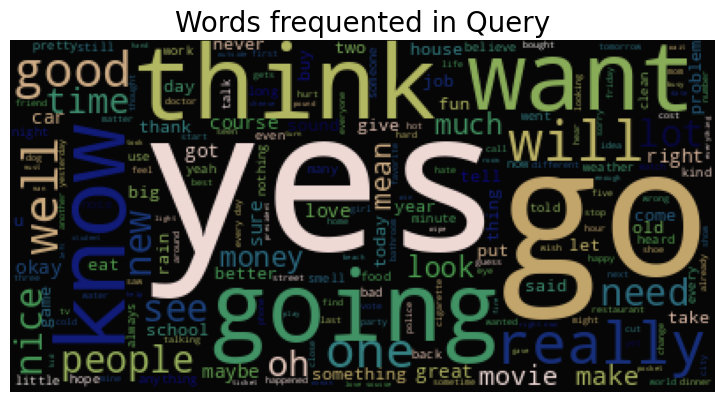

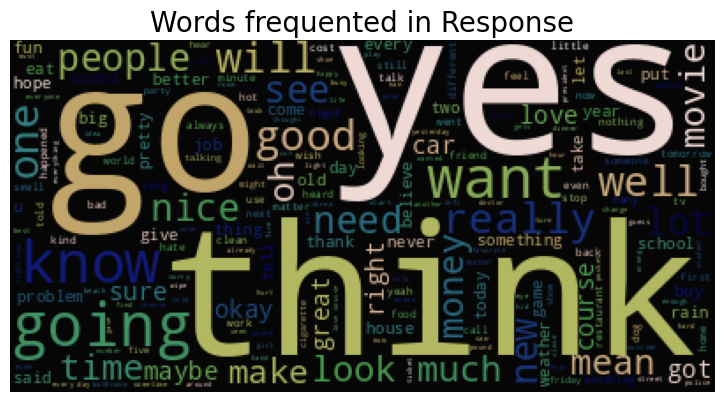

In [140]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.corpus import stopwords
import string
import re
import nltk
import string
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
# Loading necessary libraries

f = open("dialogs.txt", "r")
print(f.read())
# reading the data 
df=pd.read_csv('dialogs.txt',names=('Query','Response'),sep=('\t'))
# Reading the data
df
# loading the data
## Data Understanding
df.shape
# There are 3724 rows and 2 columns in our dataset
df.columns
# Displaying the names of columns present in the dataset
df.info()
# Checking information of the data
df.describe()
# Describe function shows us the frequency,unique and counts of all columns
df.nunique()
# nunique() function return number of unique elements in the object. 
df.isnull().sum()
# Checking for the presence of null values in the data. As we can see there are no null values present in the data
df['Query'].value_counts()
# Checking the counts of the values present in the column 'Query'
df['Response'].value_counts()
# Checking the counts of the values present in the column 'Response'
## Data Visualization
from nltk.sentiment.vader import SentimentIntensityAnalyzer
Text=df['Query']
sid = SentimentIntensityAnalyzer()
for sentence in Text:
     print(sentence)
        
     ss = sid.polarity_scores(sentence)
     for k in ss:
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()
analyzer = SentimentIntensityAnalyzer()
df['rating'] = Text.apply(analyzer.polarity_scores)
df=pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)
### Creating a dataframe.
df
from wordcloud import WordCloud
# importing word cloud
def wordcloud(df, label):
    
    subset=df[df[label]==1]
    text=df.Query.values
    wc= WordCloud(background_color="black",max_words=1000)

    wc.generate(" ".join(text))

    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)
# visualising wordcloud    
wordcloud(df,'Query')
# top words in the query column
wordcloud(df,'Response')
# top words in the response column
## Text-Normalization
# Removing special characters
import re
# importing regular expressions
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
# Lower case conversion
remove_n = lambda x: re.sub("\n", " ", x)
# removing \n and replacing them with empty value
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
# removing non ascii characters
#alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
# removing alpha numeric values
df['Query'] = df['Query'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on query column
#df['Response'] = df['Response'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# using map function and applying the function on response column
df
# final cleaned dataset
pd.set_option('display.max_rows',3800)
# Displaying all rows in the dataset
df
### Important Sentence
imp_sent=df.sort_values(by='compound', ascending=False)
# arranging the compound column in descending order to find the best sentence. 
imp_sent.head(5)
# printing the first 5 rows
### Top Positive Sentence
pos_sent=df.sort_values(by='pos', ascending=False)
# Arranging the dataframe by positive column in descending order to find the best postive sentence.
pos_sent.head(5)
# printing the first 5 rows
### Top Negative Sentence
neg_sent=df.sort_values(by='neg', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best negative sentence.
neg_sent.head(5)
# printing the first 5 rows
### Top Neutral Sentence
neu_sent=df.sort_values(by='neu', ascending=False)
# Arranging the dataframe by negative column in descending order to find the best neutral sentence.
neu_sent.head(5)
# printing the first 5 rows
from sklearn.feature_extraction.text import TfidfVectorizer
# importing tfidf vectorizer
tfidf = TfidfVectorizer()
# Word Embedding - TF-IDF
factors = tfidf.fit_transform(df['Query']).toarray()
# changing column into array
tfidf.get_feature_names_out()
# displaying feature names
# Application
from sklearn.metrics.pairwise import cosine_distances
query = 'who are you ?'
def chatbot(query):
    # step:-1 clean
    query = WordNetLemmatizer().lemmatize(query)
    # step:-2 word embedding - transform
    query_vector = tfidf.transform([query]).toarray()
    # step-3: cosine similarity
    similar_score = 1 -cosine_distances(factors,query_vector)
    index = similar_score.argmax() # take max index position
    # searching or matching question
    matching_question = df.loc[index]['Query']
    response = df.loc[index]['Response']
    pos_score = df.loc[index]['pos']
    neg_score = df.loc[index]['neg']
    neu_score = df.loc[index]['neu']
    confidence = similar_score[index][0]
    chat_dict = {'match':matching_question,
                'response':response,
                'score':confidence,
                'pos':pos_score,
                'neg':neg_score,
                'neu':neu_score}
    return chat_dict
while True:
    query = input('USER: ')
    if query == 'exit':
        break
        
    response = chatbot(query)
    if response['score'] <= 0.2: # 
        print('BOT: Please rephrase your Question.')
    
    else:
        print('='*80)
        print('logs:\n Matched Question: %r\n Confidence Score: %0.2f \n PositiveScore: %r \n NegativeScore: %r\n NeutralScore: %r'%(
            response['match'],response['score']*100,response['pos'],response['neg'],response['neu']))
        print('='*80)
        print('BOT: ',response['response'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
